In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [156]:
df = pd.read_csv(r'C:\Users\skme2\OneDrive\Documents\Python Scripts\MACHINE LEARNING PRACTICE\Machine Learning Module 1-20220107T111833Z-001\Machine Learning Module 1\LinearRegression-master (1)\LinearRegression-master\LinearRegressionTillCloud\Advertising.csv')

In [6]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.columns


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

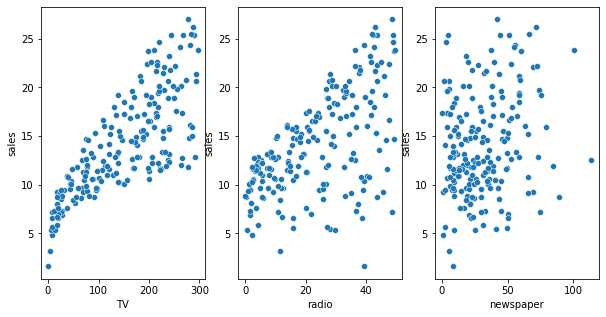

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.scatterplot(x = 'TV', y = 'sales', data=df)

plt.subplot(1,3,2)
sns.scatterplot(x = 'radio', y = 'sales', data=df)

plt.subplot(1,3,3)
sns.scatterplot(x = 'newspaper', y = 'sales', data=df)

plt.show()

In [21]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [30]:
X = df[['TV']]
y = df.sales

In [31]:
from sklearn.linear_model import LinearRegression
liner_model = LinearRegression()
liner_model.fit(X,y)

LinearRegression()

In [32]:
liner_model.coef_

array([0.04753664])

In [33]:
liner_model.intercept_

7.032593549127694

In [34]:
7.032593549127694 + 0.04753664*50

9.409425549127693

In [38]:
X_new = pd.DataFrame({"TV":[50]})
X_new.head()

,TV
0,50


In [39]:
liner_model.predict(X_new)

array([9.40942557])

In [42]:
df['TV'].min()

0.7

In [43]:
df['TV'].max()

296.4

In [45]:
X_new = pd.DataFrame({
    'TV':[df['TV'].min(), df['TV'].max()]
})

In [46]:
X_new.head()

,TV
0,0.7
1,296.4


In [49]:
preds = liner_model.predict(X_new)

C:\Users\skme2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


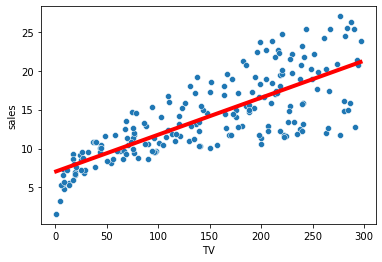

In [53]:
sns.scatterplot('TV', 'sales', data=df)
plt.plot(X_new, preds, color = 'red', linewidth = 4)

In [55]:
import statsmodels.formula.api as smf


In [59]:
stats_linear = smf.ols(formula='sales~TV', data=df).fit()

In [60]:
stats_linear.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [61]:
stats_linear.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [62]:
stats_linear.rsquared

0.611875050850071

In [63]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [64]:
df.drop(columns='Unnamed: 0', inplace= True)

In [65]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [67]:
y = df['sales']

In [70]:
X = df.drop(columns='sales')

In [71]:
liner_model.fit(X,y)

LinearRegression()

In [72]:
liner_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [73]:
liner_model.intercept_

2.9388893694594067

In [76]:
stats_model = smf.ols(formula="sales~TV+radio+newspaper", data=df).fit()

In [77]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        11:44:25   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
stats_model.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [80]:
stats_modeltvradio = smf.ols(formula="sales~TV+radio", data=df).fit()

In [81]:
stats_modeltvradio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           4.83e-98
Time:                        11:45:45   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
stats_modeltvradio.rsquared

0.8971942610828956

In [83]:
import numpy as np


In [187]:
np.random.seed(12345)

In [188]:
nums = np.random.rand(len(df))

In [189]:
mask_large = nums>0.5

In [190]:
df['Scale'] = 'small'

In [191]:
df

,Unnamed: 0,TV,radio,newspaper,sales,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban,Scale
0,1,230.1,37.8,69.2,22.1,rural,0,0,small
1,2,44.5,39.3,45.1,10.4,urban,0,1,small
2,3,17.2,45.9,69.3,9.3,rural,0,0,small
3,4,151.5,41.3,58.5,18.5,urban,0,1,small
4,5,180.8,10.8,58.4,12.9,suburban,1,0,small
...,...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,suburban,1,0,small
196,197,94.2,4.9,8.1,9.7,urban,0,1,small
197,198,177.0,9.3,6.4,12.8,suburban,1,0,small
198,199,283.6,42.0,66.2,25.5,rural,0,0,small


In [192]:
df.loc[mask_large, 'Scale'] = 'large'

In [193]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban,Scale
0,1,230.1,37.8,69.2,22.1,rural,0,0,large
1,2,44.5,39.3,45.1,10.4,urban,0,1,small
2,3,17.2,45.9,69.3,9.3,rural,0,0,small
3,4,151.5,41.3,58.5,18.5,urban,0,1,small
4,5,180.8,10.8,58.4,12.9,suburban,1,0,large


In [194]:
df[df['Scale'] == 'large']

,Unnamed: 0,TV,radio,newspaper,sales,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban,Scale
0,1,230.1,37.8,69.2,22.1,rural,0,0,large
4,5,180.8,10.8,58.4,12.9,suburban,1,0,large
5,6,8.7,48.9,75.0,7.2,suburban,1,0,large
6,7,57.5,32.8,23.5,11.8,suburban,1,0,large
7,8,120.2,19.6,11.6,13.2,urban,0,1,large
...,...,...,...,...,...,...,...,...,...
187,188,191.1,28.7,18.2,17.3,rural,0,0,large
190,191,39.5,41.1,5.8,10.8,suburban,1,0,large
191,192,75.5,10.8,6.0,9.9,rural,0,0,large
194,195,149.7,35.6,6.0,17.3,rural,0,0,large


In [195]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban,Scale
0,1,230.1,37.8,69.2,22.1,rural,0,0,large
1,2,44.5,39.3,45.1,10.4,urban,0,1,small
2,3,17.2,45.9,69.3,9.3,rural,0,0,small
3,4,151.5,41.3,58.5,18.5,urban,0,1,small
4,5,180.8,10.8,58.4,12.9,suburban,1,0,large


In [196]:
df['IsLarge'] =  df['Scale'].map({'small':0, "large":1})

In [197]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban,Scale,IsLarge
0,1,230.1,37.8,69.2,22.1,rural,0,0,large,1
1,2,44.5,39.3,45.1,10.4,urban,0,1,small,0
2,3,17.2,45.9,69.3,9.3,rural,0,0,small,0
3,4,151.5,41.3,58.5,18.5,urban,0,1,small,0
4,5,180.8,10.8,58.4,12.9,suburban,1,0,large,1


In [115]:
y = df['sales']

In [123]:
X =df.drop(columns=['sales', "Scale"])

In [124]:
X

,TV,radio,newspaper,IsLarge
0,230.1,37.8,69.2,1
1,44.5,39.3,45.1,0
2,17.2,45.9,69.3,0
3,151.5,41.3,58.5,1
4,180.8,10.8,58.4,0
...,...,...,...,...
195,38.2,3.7,13.8,1
196,94.2,4.9,8.1,1
197,177.0,9.3,6.4,0
198,283.6,42.0,66.2,0


In [125]:
linear_model = LinearRegression()

In [126]:
linear_model.fit(X,y)

LinearRegression()

In [127]:
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']

In [128]:
linear_model.coef_

array([ 0.04588872,  0.18805207, -0.00049938,  0.17502646])

In [132]:
i = 0

for col in feature_cols:
    print("The cofficient will be", col, ":", linear_model.coef_[i])
    i+=1

The cofficient will be TV : 0.04588872172029394
The cofficient will be radio : 0.18805207011074676
The cofficient will be newspaper : -0.0004993799598608745
The cofficient will be IsLarge : 0.17502646122141122


In [133]:
np.random.seed(12345)

In [166]:
nums = np.random.rand(len(df))

In [167]:
mask_urban = nums>0.66

In [168]:
mask_suburban = (nums>0.33) & (nums<0.66)

In [169]:
df['Targeted Geography'] = 'rural'

In [170]:
df.loc[mask_urban,'Targeted Geography '] = 'urban'

In [171]:
df.loc[mask_suburban, 'Targeted Geography'] = 'suburban'

In [174]:
df = pd.read_csv(r'C:\Users\skme2\OneDrive\Documents\Python Scripts\MACHINE LEARNING PRACTICE\Machine Learning Module 1-20220107T111833Z-001\Machine Learning Module 1\LinearRegression-master (1)\LinearRegression-master\LinearRegressionTillCloud\Advertising.csv')

In [175]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [176]:
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(df))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
df['Targeted Geography'] = 'rural'
df.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
df.loc[mask_urban, 'Targeted Geography'] = 'urban'
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Targeted Geography
0,1,230.1,37.8,69.2,22.1,rural
1,2,44.5,39.3,45.1,10.4,urban
2,3,17.2,45.9,69.3,9.3,rural
3,4,151.5,41.3,58.5,18.5,urban
4,5,180.8,10.8,58.4,12.9,suburban


In [180]:
area_dummies = pd.get_dummies(df['Targeted Geography'], prefix='Targeted Geography', drop_first=True)

In [181]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Targeted Geography
0,1,230.1,37.8,69.2,22.1,rural
1,2,44.5,39.3,45.1,10.4,urban
2,3,17.2,45.9,69.3,9.3,rural
3,4,151.5,41.3,58.5,18.5,urban
4,5,180.8,10.8,58.4,12.9,suburban


In [185]:
df = pd.concat([df,area_dummies], axis=1)

In [198]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban,Scale,IsLarge
0,1,230.1,37.8,69.2,22.1,rural,0,0,large,1
1,2,44.5,39.3,45.1,10.4,urban,0,1,small,0
2,3,17.2,45.9,69.3,9.3,rural,0,0,small,0
3,4,151.5,41.3,58.5,18.5,urban,0,1,small,0
4,5,180.8,10.8,58.4,12.9,suburban,1,0,large,1


In [199]:
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban']

In [200]:
X = df[feature_cols]

In [201]:
y = df['sales']

In [202]:
new_linear_model = LinearRegression()

In [203]:
new_linear_model.fit(X,y)

LinearRegression()

In [204]:
print(feature_cols, new_linear_model.coef_)

['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


In [205]:
i = 0

for col in feature_cols:
    print("Coefficient : ", col , 'is:', new_linear_model.coef_[i])
    i+=1

Coefficient :  TV is: 0.04574401036331374
Coefficient :  radio is: 0.1878666955252583
Coefficient :  newspaper is: -0.001087697726710907
Coefficient :  IsLarge is: 0.07739660749747916
Coefficient :  Targeted Geography_suburban is: -0.1065629901595862
Coefficient :  Targeted Geography_urban is: 0.2681380216522006


In [207]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
sns.set()

In [210]:
def adjr2(x,y):
    r2 = regression.score(x,y)
    N = x.shape[0]
    P = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(N-1)/(N-P-1)
    return adjusted_r2

In [212]:
df = pd.read_csv(r'C:\Users\skme2\OneDrive\Documents\Python Scripts\MACHINE LEARNING PRACTICE\Machine Learning Module 1-20220107T111833Z-001\Machine Learning Module 1\LinearRegression-master (1)\LinearRegression-master\LinearRegressionTillCloud\Admission_Prediction.csv')

In [213]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [214]:
df.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [215]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [219]:
df['GRE Score']=df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score']=df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating']=df['University Rating'].fillna(df['University Rating'].mode()[0])

In [220]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [222]:
df.drop(columns='Serial No.', inplace=True)

In [223]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

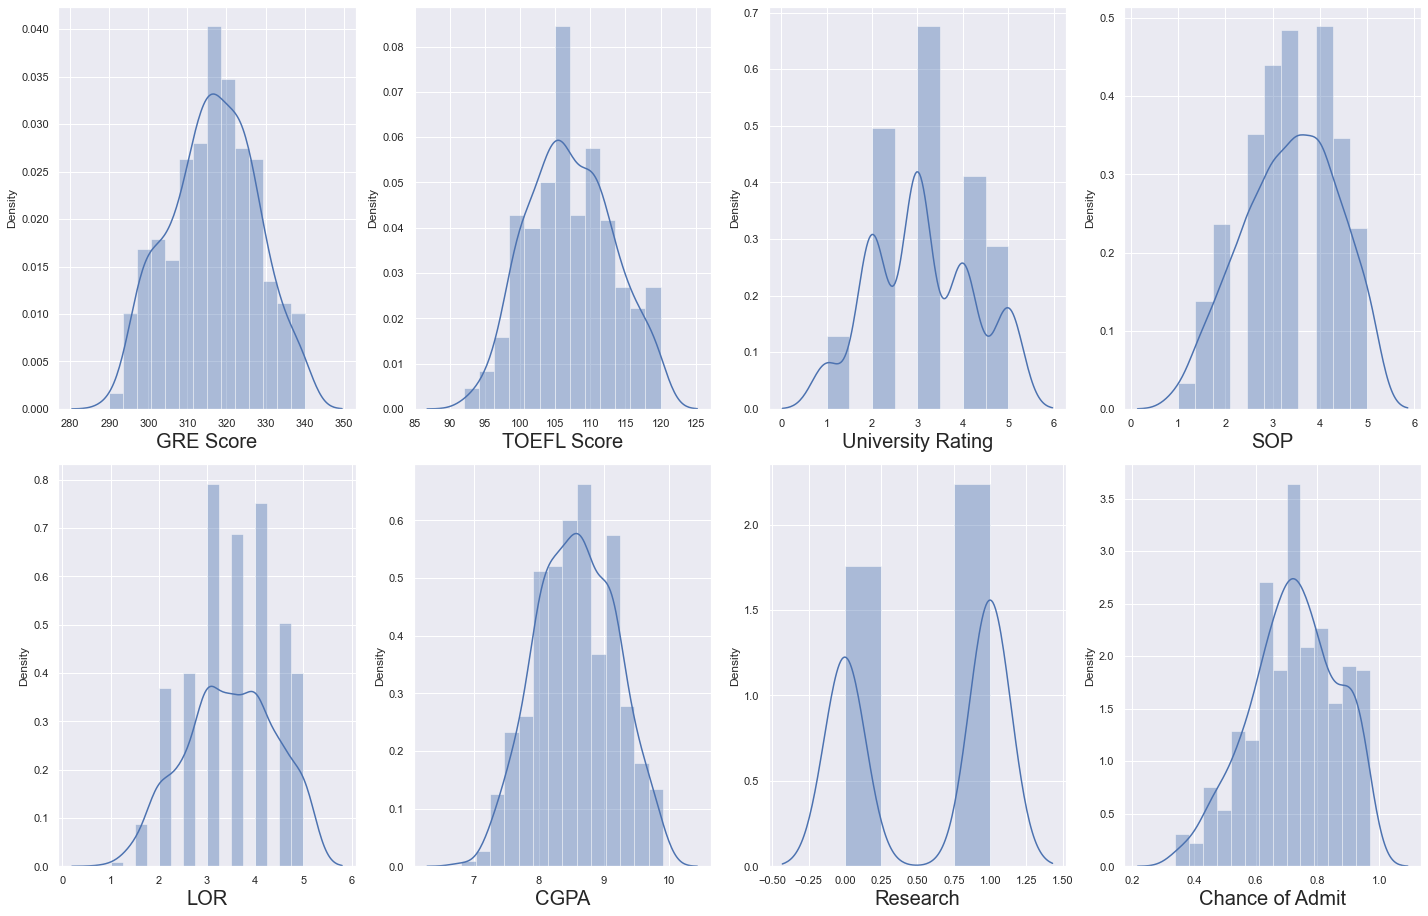

In [225]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1


for col in df:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 20)
    plotnumber+=1
plt.tight_layout()
        
    

In [226]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [228]:
y = df['Chance of Admit']

In [230]:
X = df.drop(columns='Chance of Admit')

In [232]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


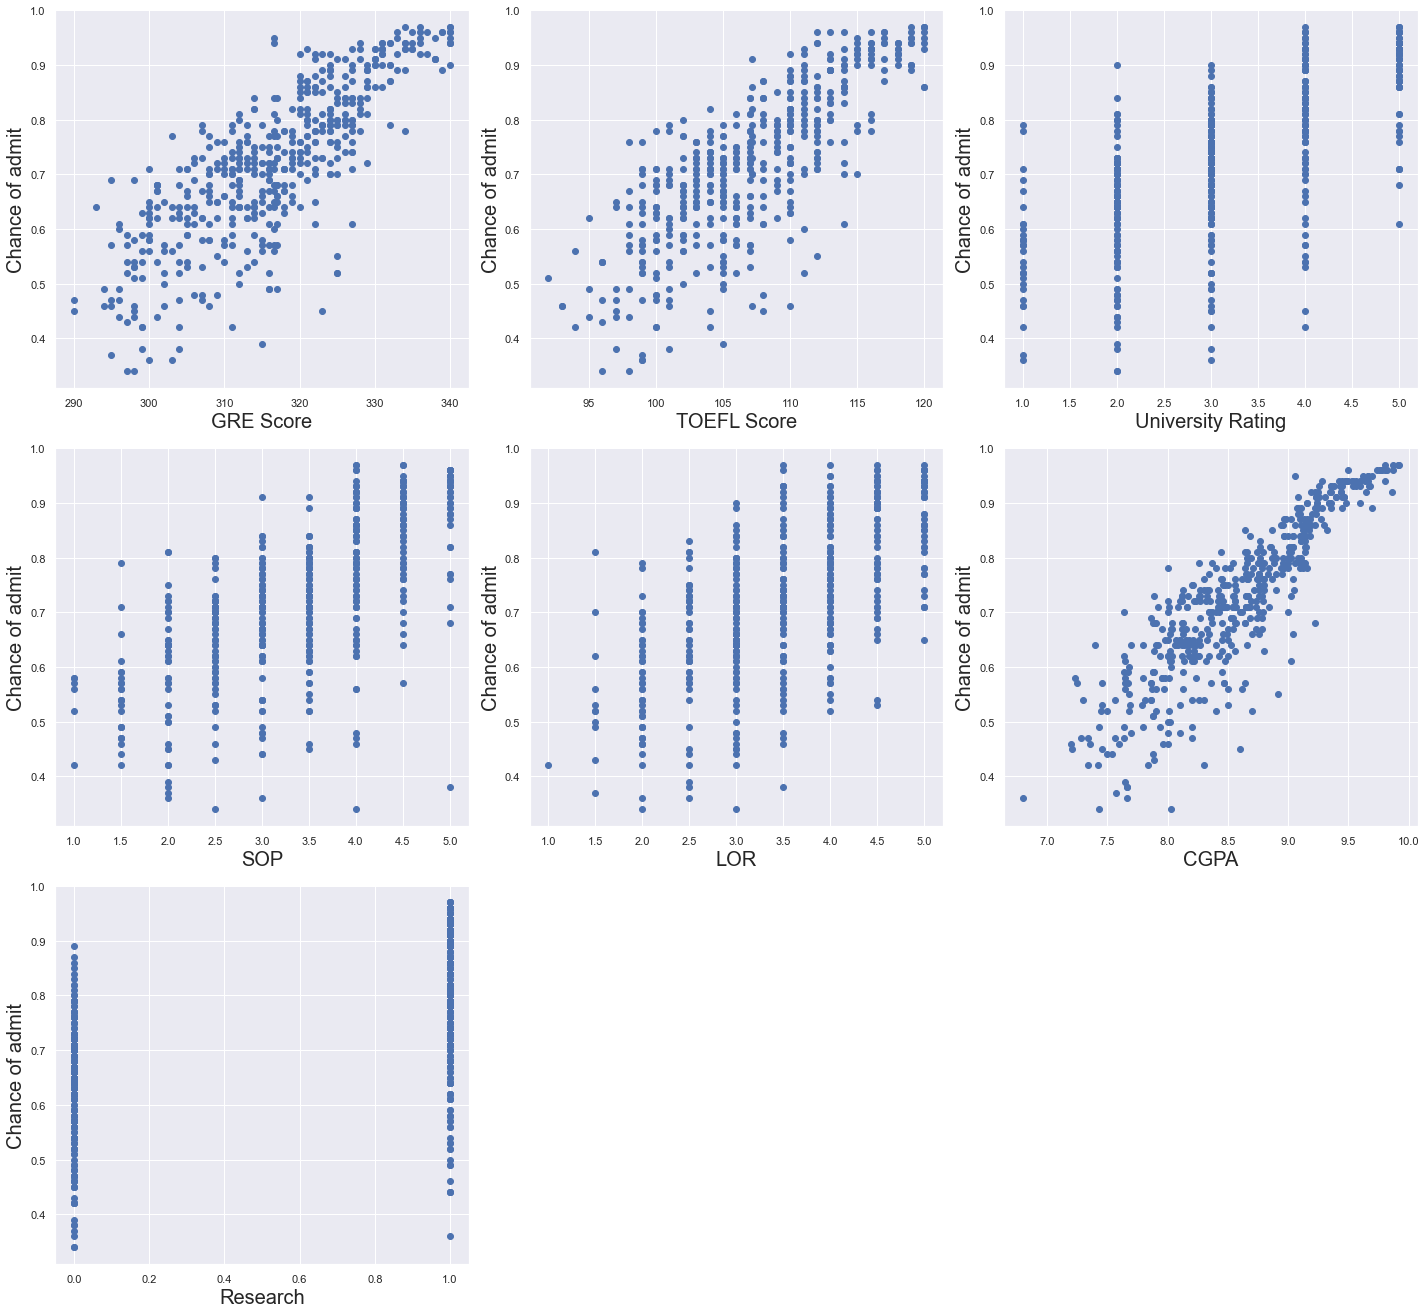

In [233]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
for col in X:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[col], y)
        plt.xlabel(col, fontsize = 20)
        plt.ylabel("Chance of admit", fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [234]:
scaler = StandardScaler()

In [235]:
X_scaled = scaler.fit_transform(X)

In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [238]:
variables = X_scaled

In [240]:
vif = pd.DataFrame()

In [246]:
vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

In [247]:
vif

,VIF
0,4.152735
1,3.793345
2,2.517272
3,2.776393
4,2.037449
5,4.654369
6,1.459411


In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=355)

In [249]:
regression = LinearRegression()

In [250]:
regression.fit(X_train, y_train)

LinearRegression()

In [251]:
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [252]:
loded_model = pickle.load(open(filename, 'rb'))

In [253]:
a = loded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [254]:
a

array([0.92190162])

In [255]:
regression.score(X_train, y_train)

0.8415250484247909

In [257]:
def adj2(x,y):
    r2 = regression.score(x,y)
    N = x.shape[0]
    P = x.shape[1]
    adjustedr2 = 1-(1-r2)*(N-1)/(N-P-1)
    return adjustedr2

In [258]:
adj2(X_train, y_train)

0.8385023654247188

In [259]:
regression.score(X_test, y_test)

0.7534898831471064

In [260]:
adj2(X_test, y_test)

0.738741414617446

In [261]:
lassocv = LassoCV(alphas=None, cv = 10, max_iter=100000, normalize=True)

In [262]:
lassocv.fit(X_train, y_train)

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=100000, normalize=True)

In [263]:
lassocv.alpha_

3.0341655445178153e-05

In [265]:
lasso_reg = Lasso(alpha=lassocv.alpha_)

In [266]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [267]:
lasso_reg.score(X_test, y_test)

0.7534654960492284

In [269]:
alphas = np.random.uniform(low = 0, high = 10,size = (50,))

In [270]:
ridgecv = RidgeCV(alphas=alphas, cv = 10, normalize=True)

In [271]:
ridgecv.fit(X_train, y_train)

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

RidgeCV(alphas=array([2.64181592, 2.76918935, 8.4235601 , 1.69622287, 2.52086626,
       5.91875201, 9.75359718, 0.04131159, 2.40016121, 7.265161  ,
       2.50724527, 9.18158136, 5.08151908, 5.02532073, 7.12303868,
       6.39768031, 2.84302642, 0.09783321, 5.94739565, 8.41014982,
       4.86590257, 7.80795137, 4.12534863, 3.79805563, 8.98445509,
       8.96726126, 7.20446749, 2.84851739, 3.39899166, 2.85171026,
       7.79610791, 0.04572874, 0.84687576, 4.41357265, 2.51067321,
       9.05872597, 8.80882678, 7.16520379, 2.38676311, 9.25290928,
       9.69618444, 5.7823901 , 2.69027627, 3.00909446, 6.25332267,
       7.7984407 , 4.21103377, 6.56979718, 4.2361992 , 3.51725869]),
        cv=10, normalize=True)

In [272]:
ridgecv.alpha_

0.04131158575894078

In [273]:
ridge_model = Ridge(alpha=ridgecv.alpha_)

In [274]:
ridge_model.fit(X_train, y_train  )

Ridge(alpha=0.04131158575894078)

In [275]:
ridge_model.score(X_test, y_test)

0.7535101580926442

In [277]:
elasticCV = ElasticNetCV(alphas=None, cv = 10, normalize=True)
elasticCV.fit(X_train, y_train)

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


ElasticNetCV(cv=10, normalize=True)

In [278]:
elasticCV.alpha_

6.0683310890356314e-05

In [280]:
elasticCV.l1_ratio

0.5

In [281]:
elasticnet_reg = ElasticNet(alpha=elasticCV.alpha_, l1_ratio=elasticCV.l1_ratio)

In [282]:
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=6.0683310890356314e-05)

In [283]:
elasticnet_reg.score(X_test, y_test)

0.7534710950712854

In [285]:
df = pd.read_csv('C:/Users/skme2/OneDrive/Documents/Python Scripts/MACHINE LEARNING PRACTICE/Machine Learning Module 1-20220107T111833Z-001/Machine Learning Module 1/LinearRegression-master (1)/LinearRegression-master/LinearRegressionTillCloud/Position_Salaries.csv')

In [286]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [292]:
X = df.iloc[:, 1:2].values

In [303]:
y = df.iloc[:,2].values

In [304]:
_linear_model = LinearRegression()

In [305]:
_linear_model.fit(X,y)

LinearRegression()

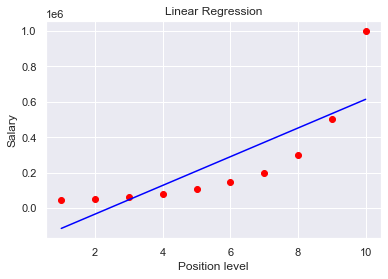

In [310]:
#sns.scatterplot(X,y, data=df)
plt.scatter(X,y, color = 'red')
plt.plot(X,_linear_model.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [311]:
from sklearn.preprocessing import PolynomialFeatures

In [313]:
poly_reg = PolynomialFeatures(degree=2)

In [314]:
X_poly = poly_reg.fit_transform(X)

In [315]:
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [316]:
poly_reg.fit(X_poly, y)

PolynomialFeatures()

In [317]:
_linear_model.fit(X_poly, y)

LinearRegression()

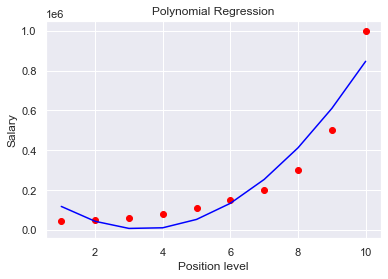

In [321]:
plt.scatter(X,y, color= 'red')
plt.plot(X, _linear_model.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [323]:
poly_reg_4= PolynomialFeatures(degree=4)

In [327]:
X_poly_4 = poly_reg_4.fit_transform(X)
poly_reg_4.fit(X_poly_4, y)

PolynomialFeatures(degree=4)

In [329]:
reg_model_new = LinearRegression()
reg_model_new.fit(X_poly_4, y)

LinearRegression()

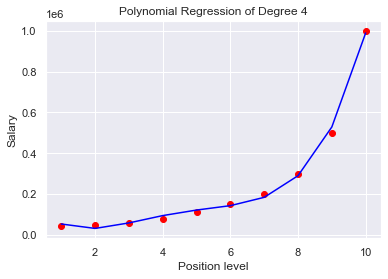

In [332]:
plt.scatter(X,y, color = 'red')
plt.plot(X, reg_model_new.predict(X_poly_4), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()